### Bivariate Normal PDF
Probability density function(PDF) for 2 random variables $ X_{1}$, $X_{2}$.

${\color{Blue} f_{X_{1},X_{2}}(x_{1},x_{2})=\frac{1}{2\pi \sigma_{x_{1}} \sigma_{x_{2}} \sqrt[]{1-\rho ^{2}} }\exp\left \{- \frac{1}{2(1-\rho^{2}) } \left [ \left ( \frac{x_{1}-\mu_{x_{1}}}{\sigma_{x_{1}}}  \right )^{2} +\left ( \frac{x_{2}-\mu_{x_{2}}}{\sigma_{x_{2}}}  \right )^{2} -2 \rho\left ( \frac{x_{1}-\mu_{x_{1}}}{\sigma_{x_{1}}}  \right ) \left ( \frac{x_{2}-\mu_{x_{2}}}{\sigma_{x_{2}}}  \right )  \right ]  \right \} } $

How to draw the figure of the Bivariate Normal PDF. Here is an examlpe of $ Bivariate normal PDF$.
Here are five parameter $ \mu_{x_{1}},\mu_{x_{2}},\sigma_{x_{1}},\sigma_{x_{2}},\rho$

${\color{Red} \mu  = \left [ \begin{matrix}
 \mu_{x_{1}}\\
 \mu_{x_{2}}
\end{matrix} \right ] }  $     ,     $\Sigma =\left [ \begin{matrix}
 \sigma_{x_{1}}^2 & \rho \sigma_{x_{1}}\sigma_{x_{2}}\\ 
\rho \sigma_{x_{1}}\sigma_{x_{2}} & \sigma_{x_{2}}^2
\end{matrix} \right ] $



C:\Users\19501\AppData\Local\Temp\ipykernel_3192\2648980201.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


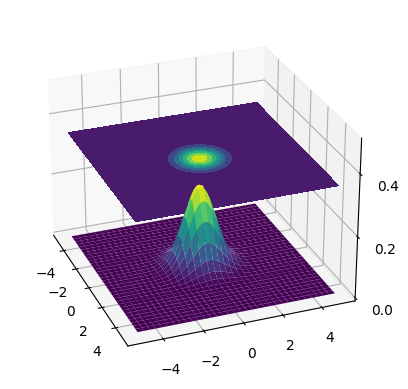

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 二维分布将覆盖变量X和变量Y
N = 100
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

# 均值向量和协方差矩阵
mu = np.array([0., 0.])
Sigma = np.array([[ 0.6, 0], [0,  0.6]])

# Pack X and Y into a single 3-dimensional array
# 将X和Y打包成一个3维数组
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """返回数组pos上的多变量高斯分布，pos是一个数组，
    通过打包变量的网格化数组构建而成，x_1, x_2, x_3,
    ..., x_k进入其_最后一个维度。"""
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=0.35, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(0,0.5,5)
ax.set_zticks(np.linspace(0,0.4,3))
ax.view_init(27, -21)

plt.show()

##  we can use the scipy.stats multivariate_normal to draw the Bivariate normal distribution.


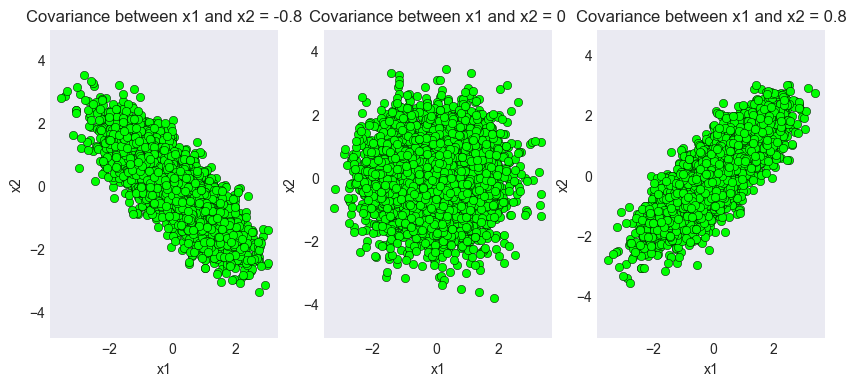

In [28]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=10,4

# Initializing the random seed
random_seed=1000

# List containing the variance covariance values
cov_val = [-0.8, 0, 0.8]

# Setting mean of the distributino to be at (0,0)
mean = np.array([0,0])

# Iterating over different covariance values
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
    # Generating a Gaussian bivariate distribution with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,seed = random_seed)
    # Generating 5000 samples out of the distribution
    data = distr.rvs(size = 5000)
    # Plotting the generated samples
    plt.plot(data[:,0],data[:,1], 'o', c='lime',markeredgewidth = 0.35,markeredgecolor = 'black')
    plt.title(f'Covariance between x1 and x2 = {val}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')

plt.show()

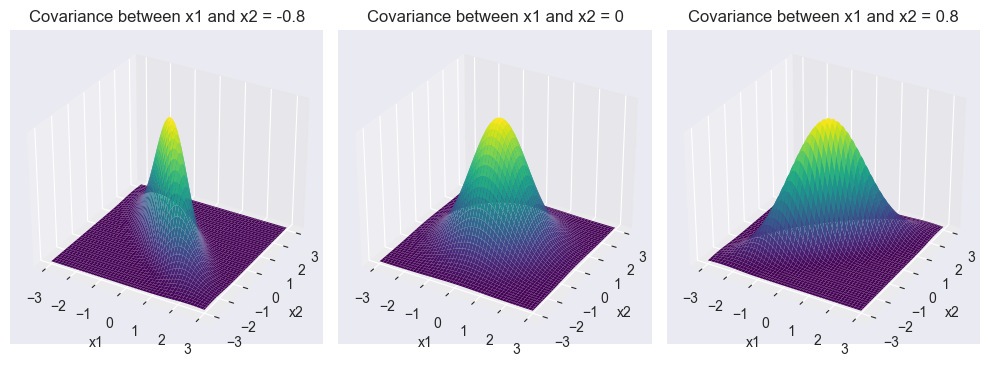

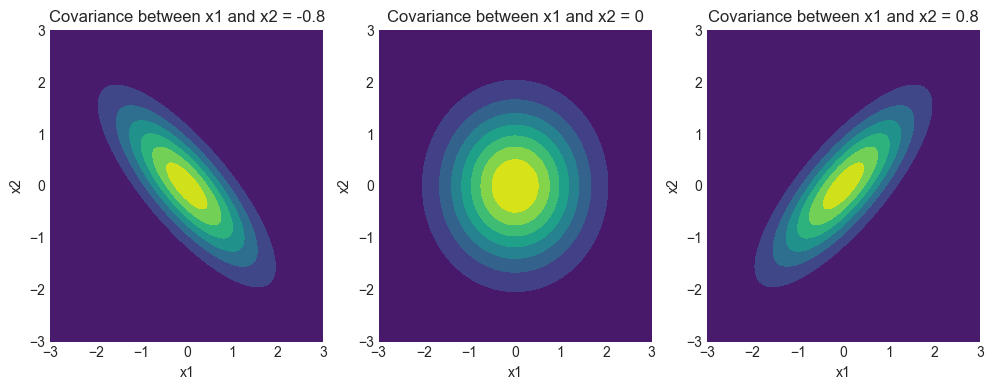

In [30]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=10,4
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance covariance values
cov_val = [-0.8, 0, 0.8]

# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])

# Storing density function values for
# further analysis
pdf_list = []

# Iterating over different covariance values
for idx, val in enumerate(cov_val):
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
    # Generating a Gaussian bivariate distribution with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,seed = random_seed)
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
    
    # Generating the density function for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()

# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()